In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [3]:
ds=pd.read_csv('happiness_score_dataset.csv');

load the datasets and ds is instance

In [4]:
data=pd.DataFrame(data=ds)

In [5]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA


In [6]:
ds.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

show the keys /columns of datasets

In [7]:
ds.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
ds.shape

(158, 12)

dataset have 158 rows and 12 columns

In [9]:
ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

dataset have int,float and object type values and happiness score is target variable contain float type

In [10]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No missing value is in datasets

In [11]:
ds['Happiness Score'].value_counts()

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
        ..
4.252    1
4.633    1
3.931    1
7.200    1
6.750    1
Name: Happiness Score, Length: 157, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE=LabelEncoder()
ds['Country']=LE.fit_transform(ds['Country'])
ds['Region']=LE.fit_transform(ds['Region'])
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


use label encoder to convert string value in integer

# VISUALIZATION

<AxesSubplot:>

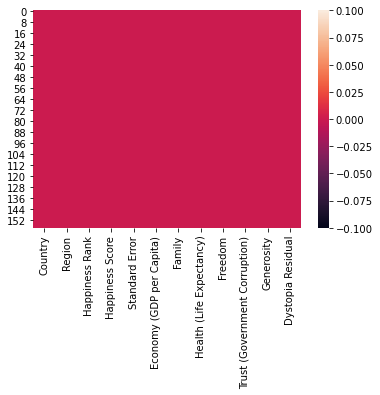

In [14]:
sns.heatmap(ds.isnull())

using heatmap shows that no null value is found in dataset 

<function matplotlib.pyplot.show(close=None, block=None)>

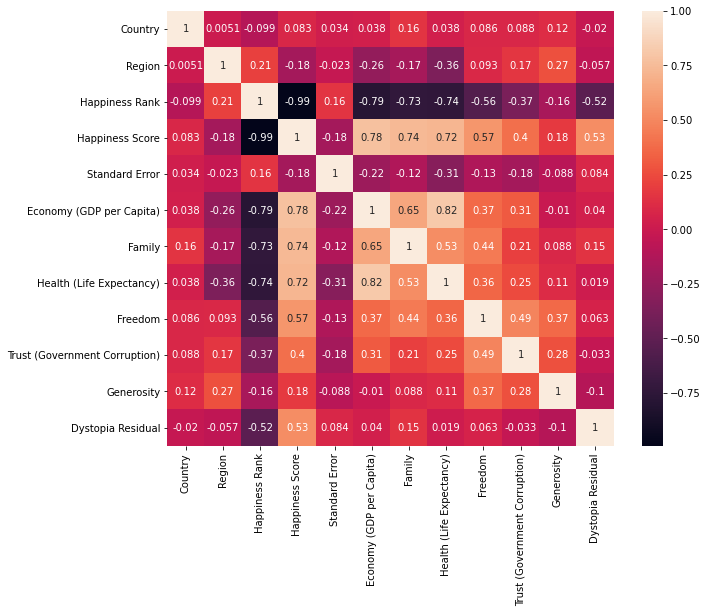

In [15]:
#visualization Multi variate to show realtion 
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(),annot=True)
plt.show

In [16]:
ds.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [17]:
ds.drop(['Happiness Rank'],axis=1,inplace=True); #drop the happiness ranck beacause not much it going to help in predict the score

In [18]:
ds=pd.DataFrame(data=ds)
ds

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
ds.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

univariate Analysis

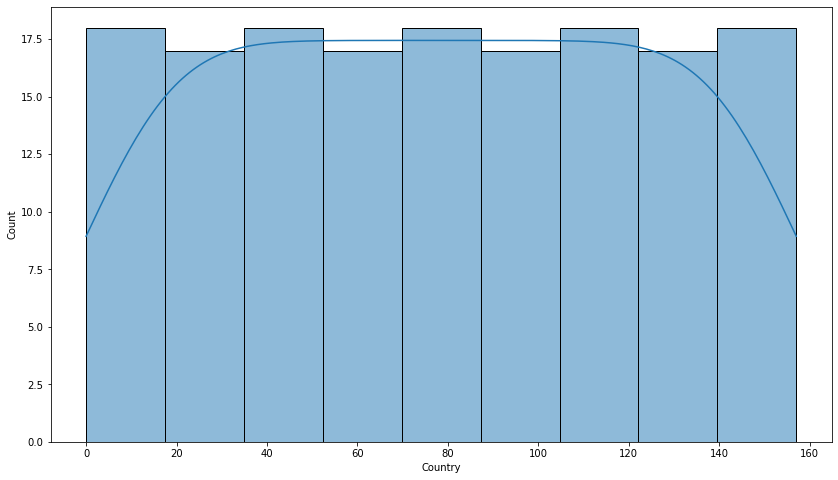

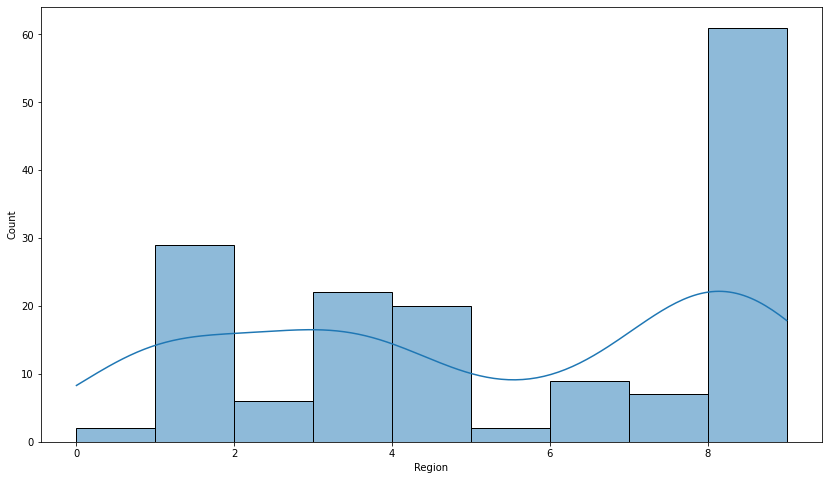

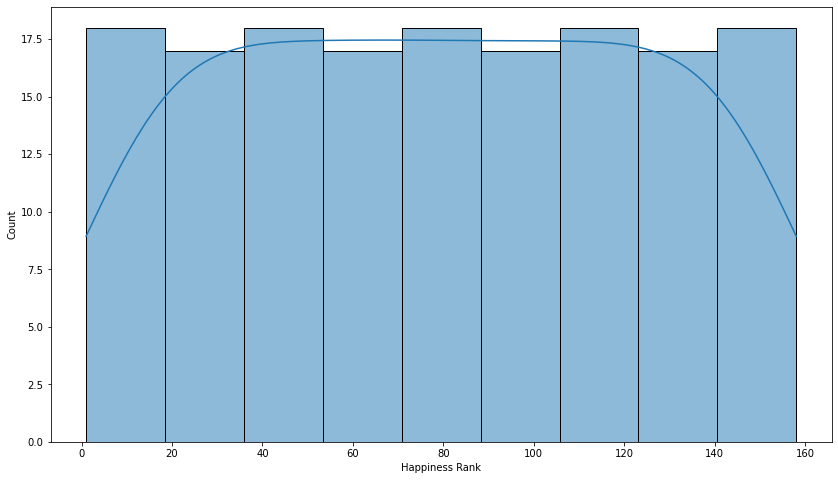

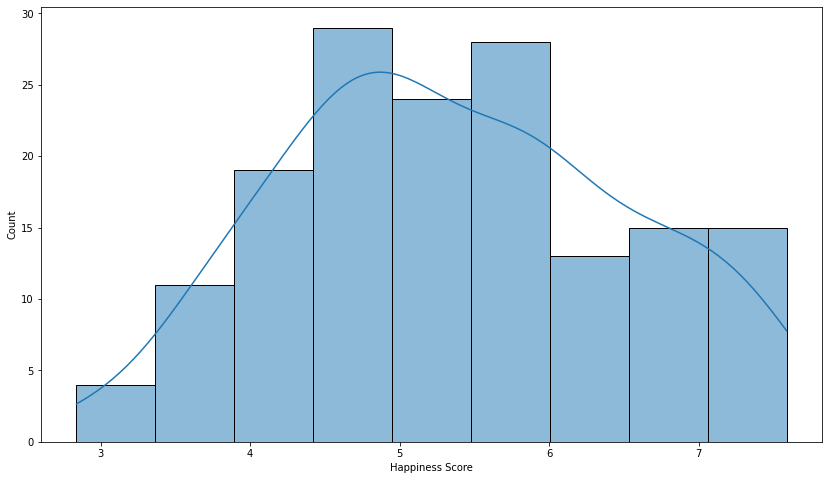

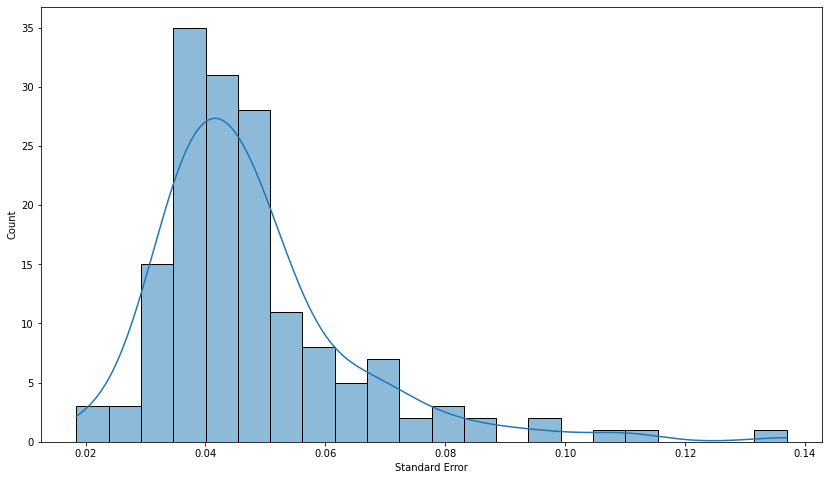

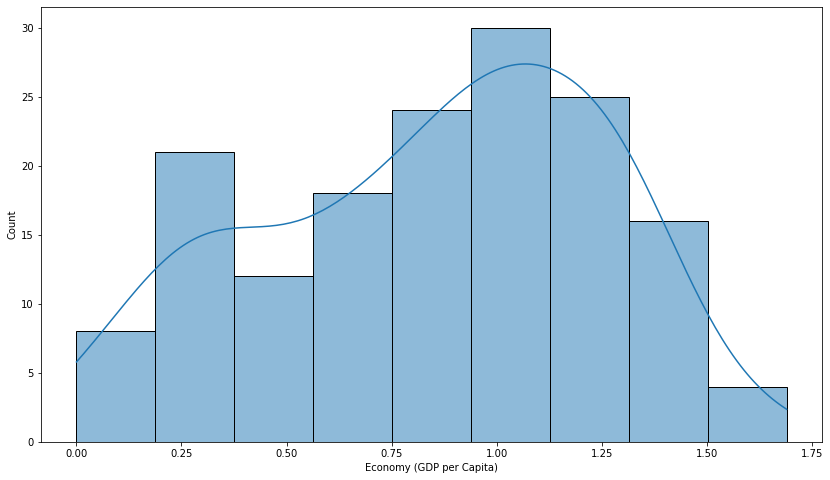

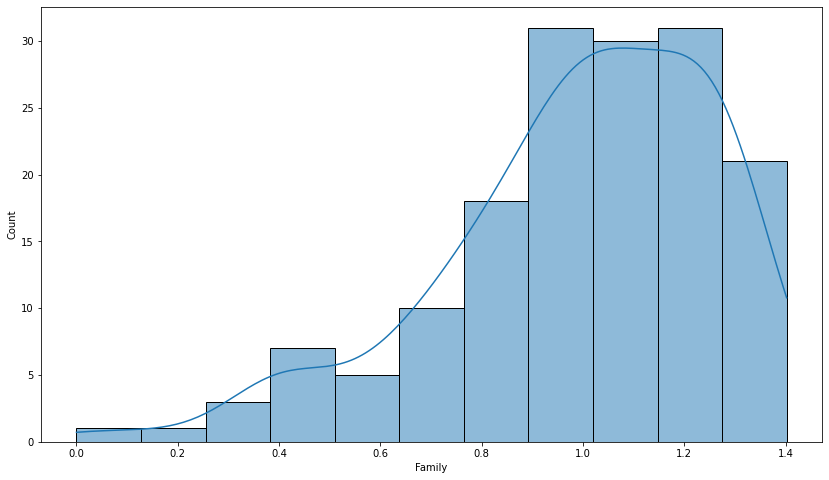

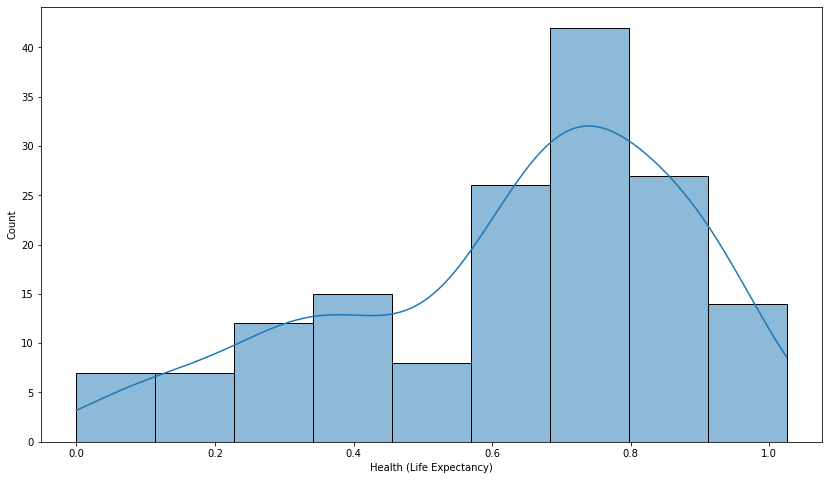

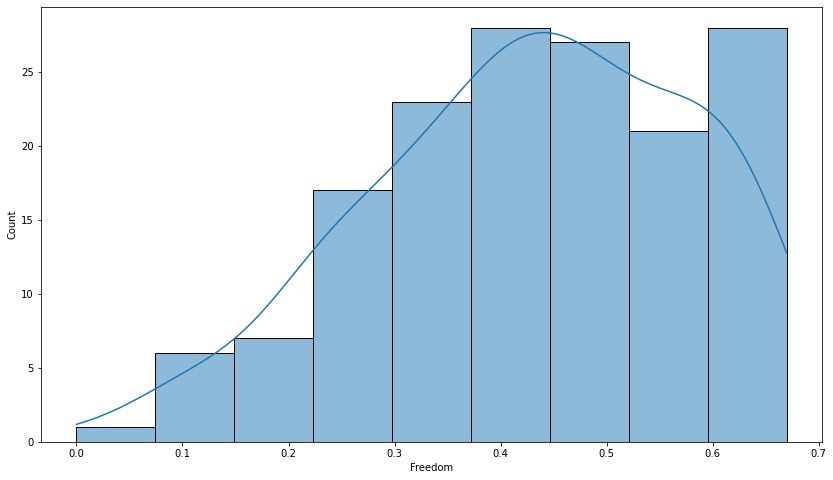

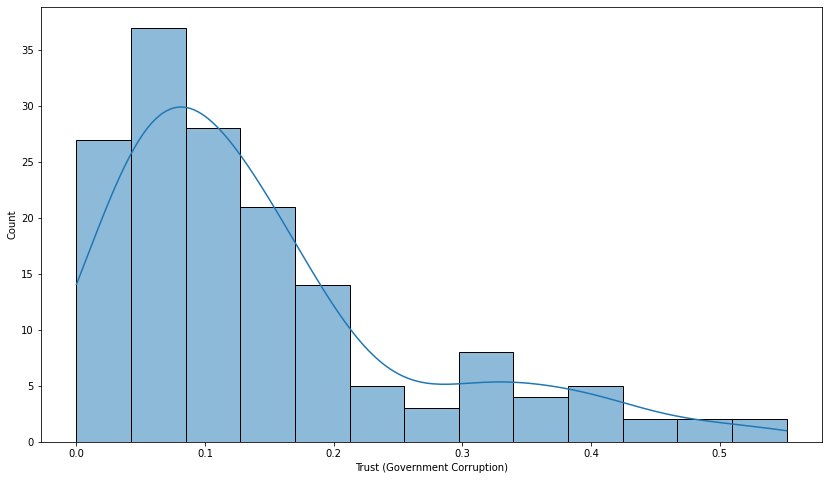

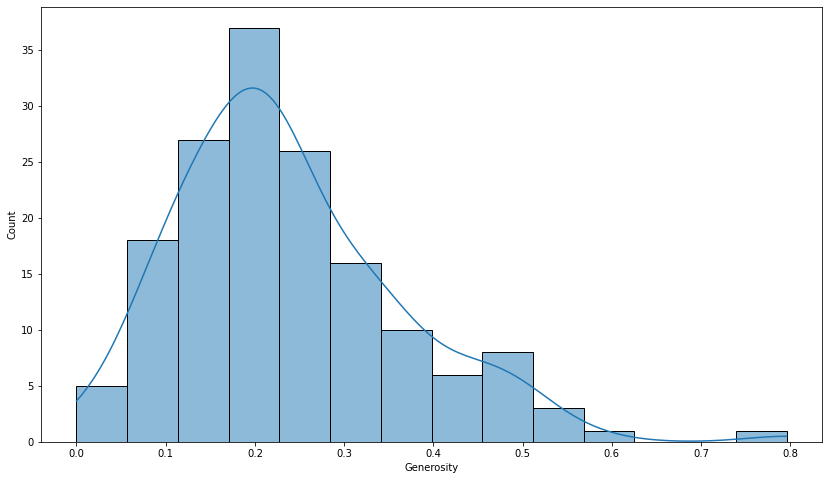

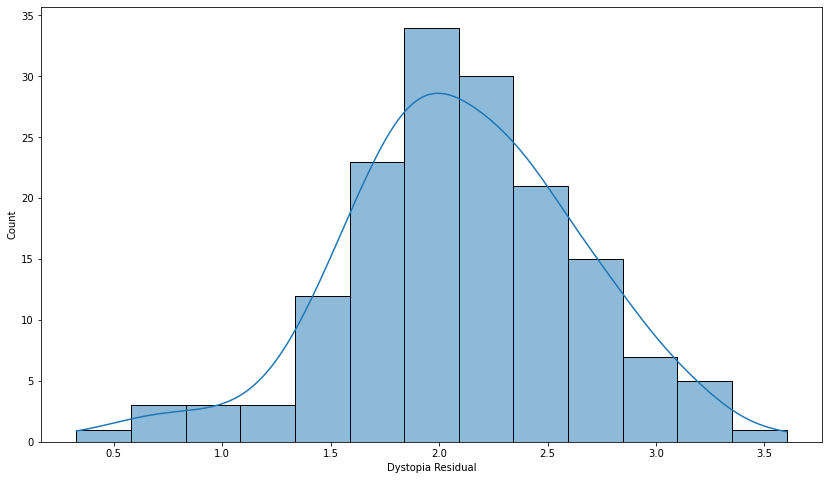

In [20]:
columns=['Country', 'Region', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
for columns in data:
    plt.figure(figsize=(14,8))
    sns.histplot(data[columns],kde=True)
plt.show()

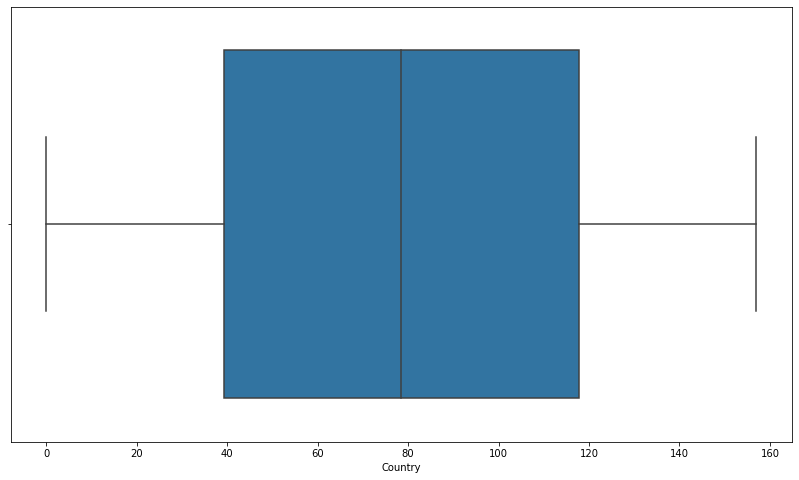

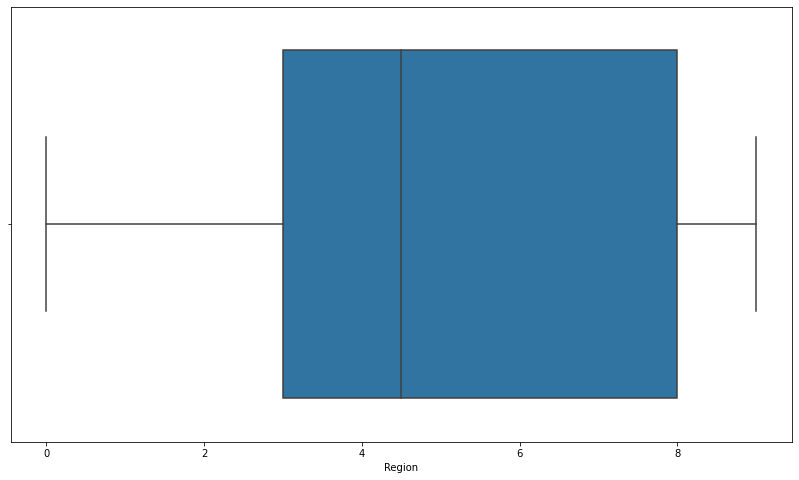

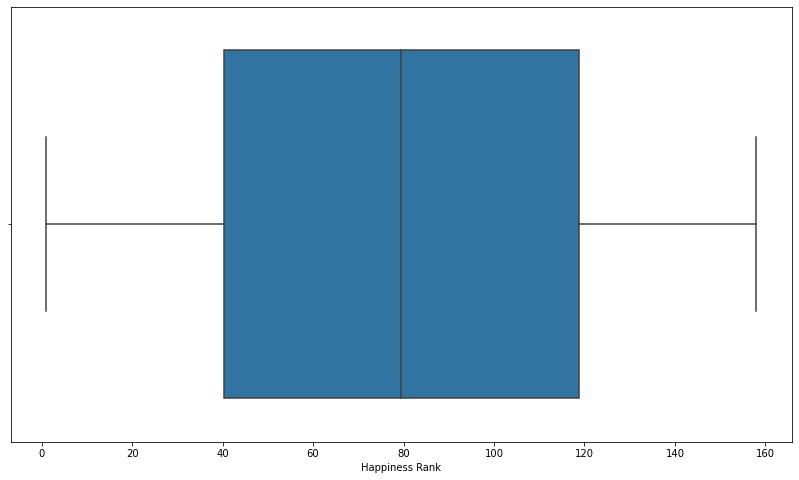

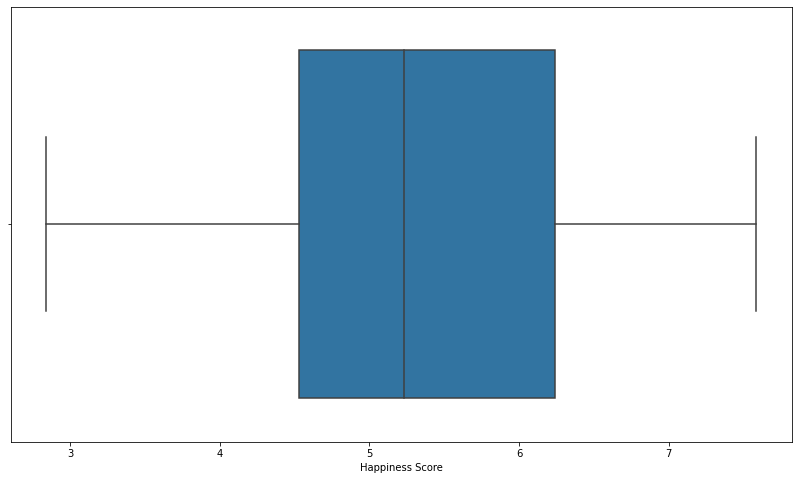

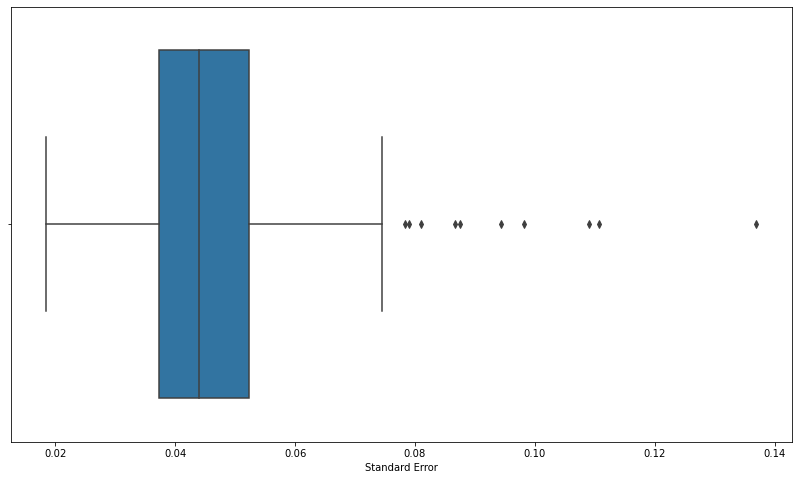

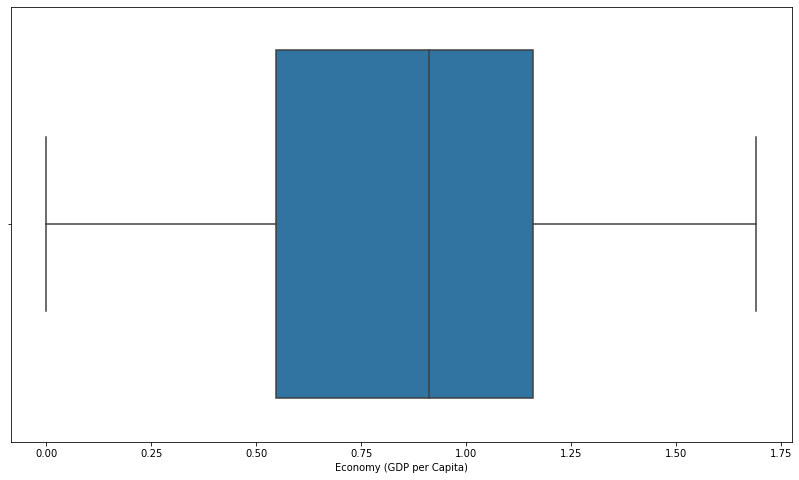

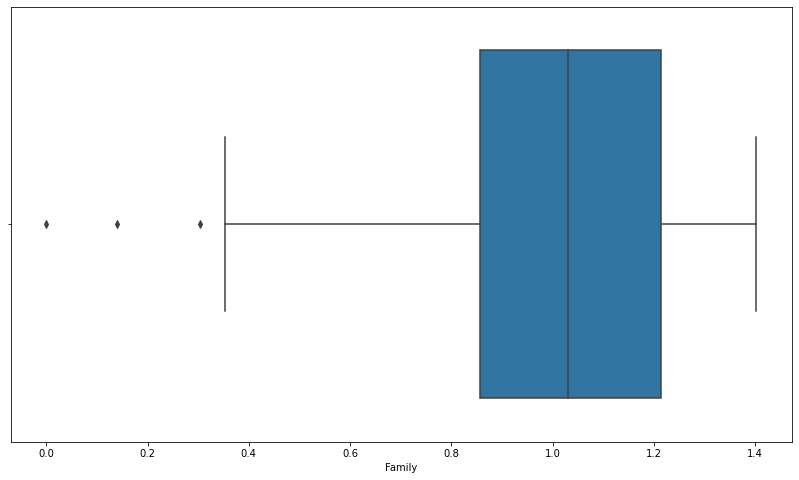

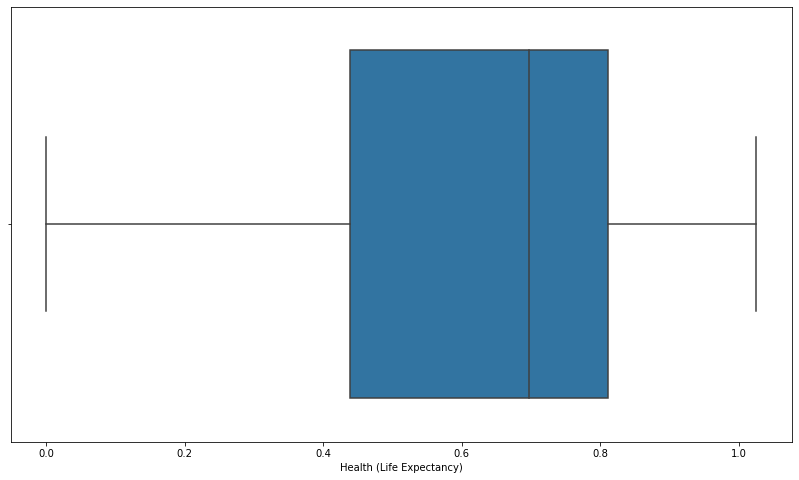

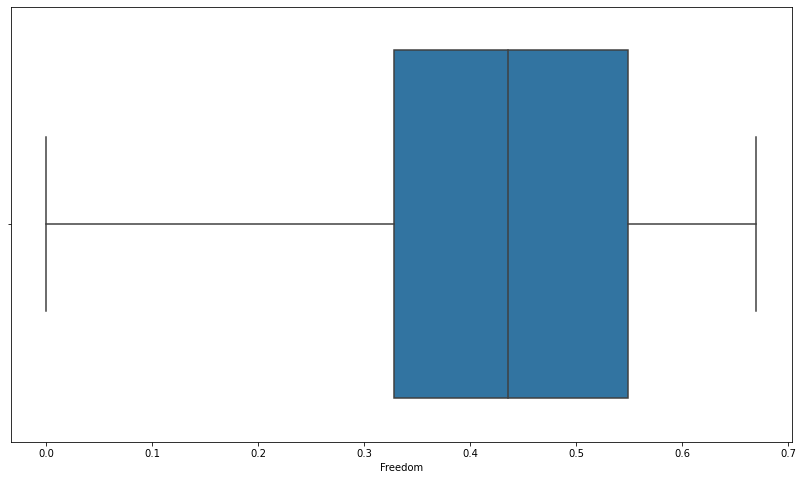

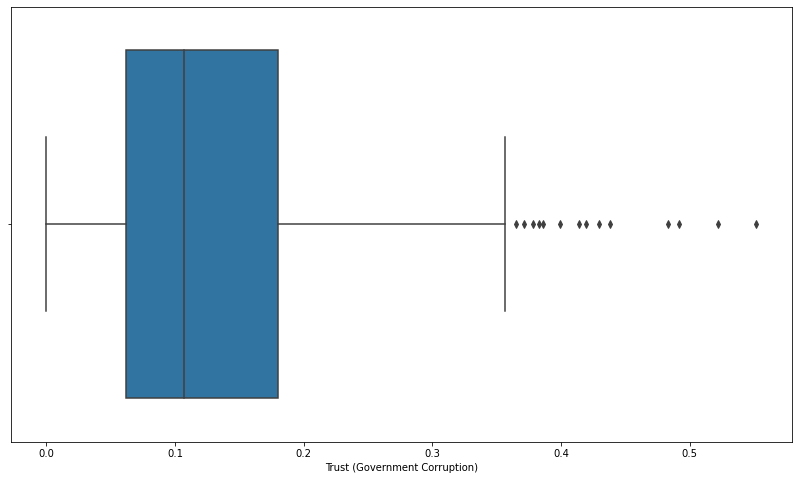

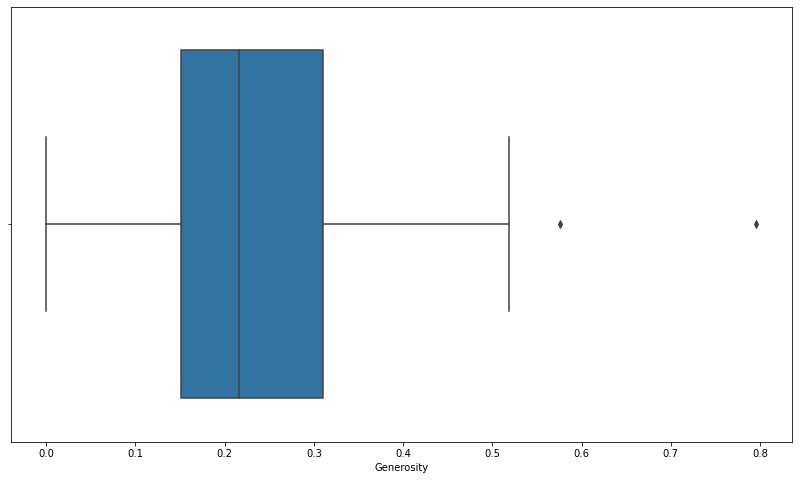

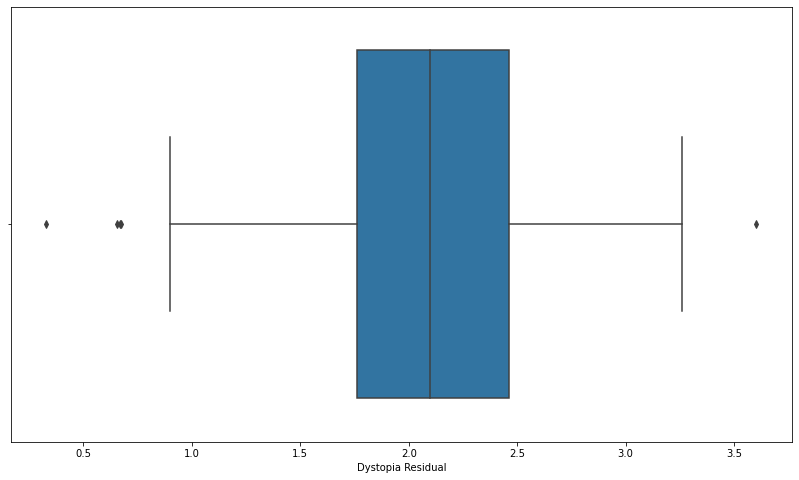

In [29]:
columns=['Country', 'Region', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']
for columns in data:
    plt.figure(figsize=(14,8))
    sns.boxplot(data[columns])
plt.show()

using boxplot find the some outlier in dataset

In [30]:
ds.skew()

Country                          0.000000
Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

skweness is in dataset

multivariate analysis

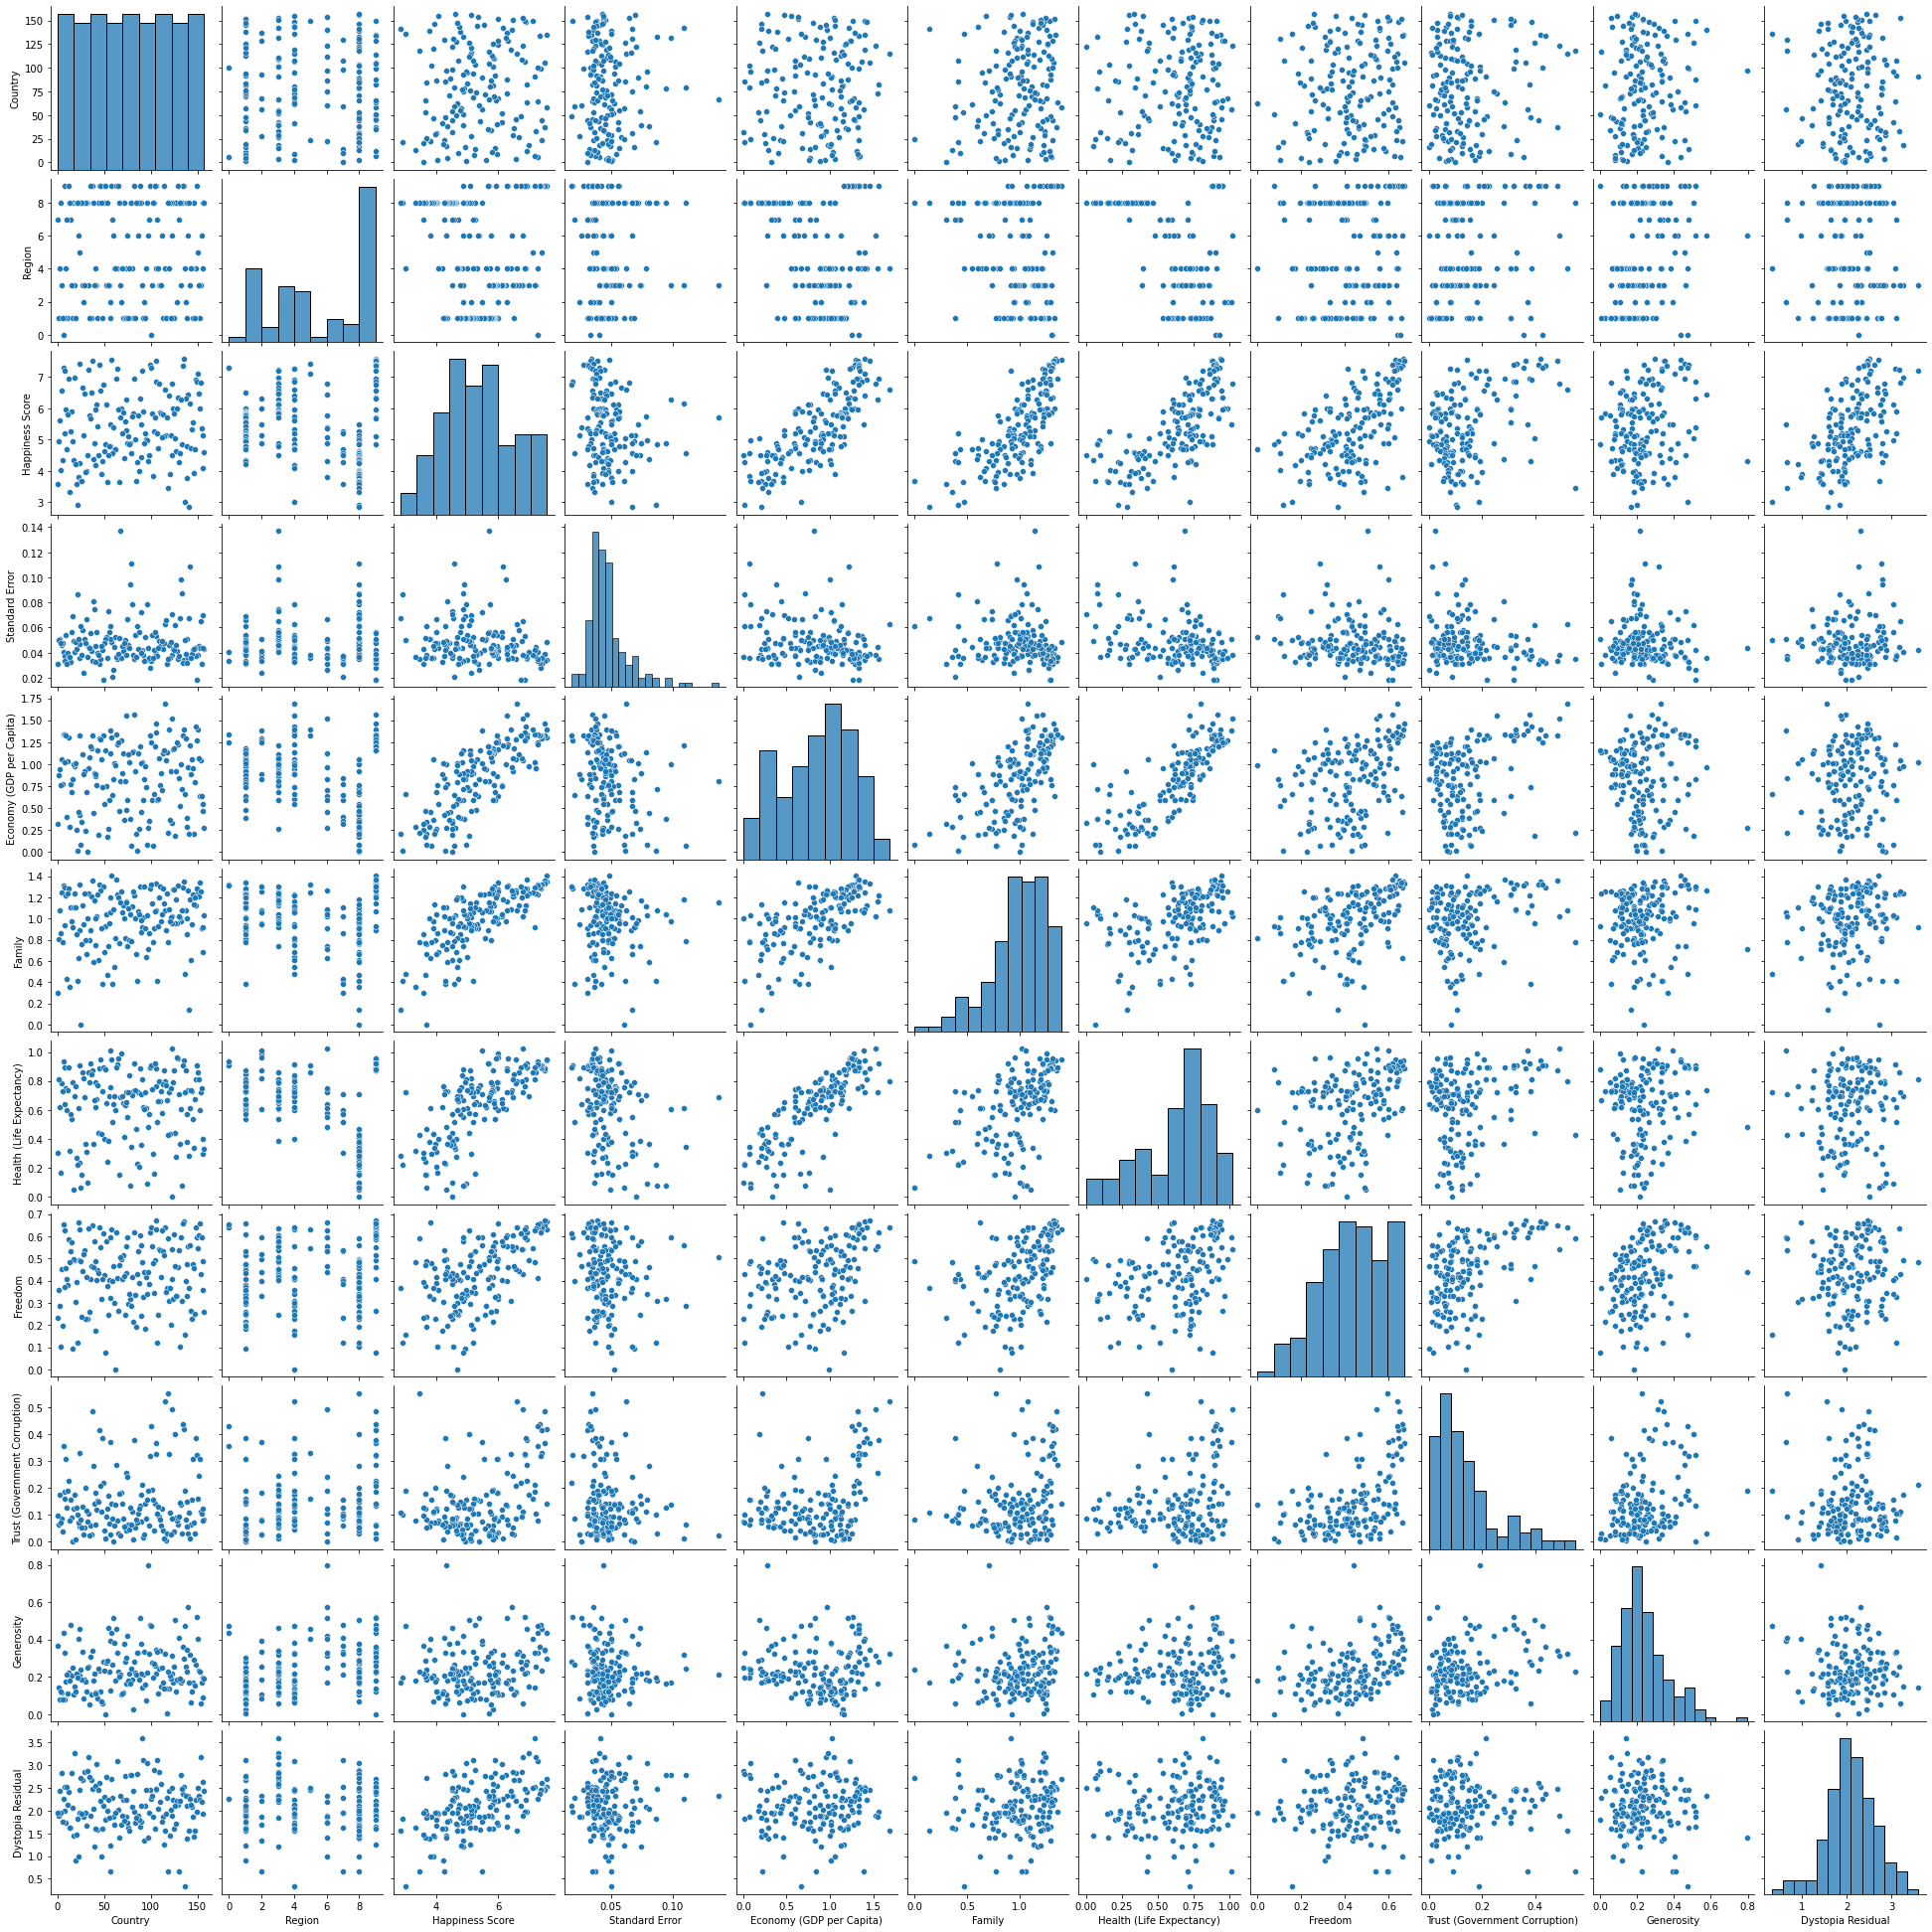

In [21]:
sns.pairplot(ds)

pre-processing or feature Engineering

In [22]:
y=ds['Happiness Score']; #label data
x=ds.drop(['Happiness Score'],axis=1); # feature data

In [23]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [24]:
x

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,118,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [32]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.23877001, 1.30025593, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [33]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [34]:
ds_new=ds[(z<3).all(axis=1)] # removing outliers

In [35]:
ds_new

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [45]:
ds.shape #shape with outliers

(158, 11)

In [47]:
ds_new.shape #after removing outliers

(149, 11)

In [49]:
ds_x=ds.drop(columns=['Happiness Score']);
y=ds['Happiness Score'];

divide dataset into x (feature) and y (target)

In [56]:
for i in ds_x.columns:
    if ds_x[i].skew()>0.5:
        ds_x[i]=np.cbrt(ds_x[i])
    if ds_x[i].skew()<0.5:
        ds_x[i]=np.cbrt(ds_x[i])
        
ds_x.skew()

Country                          -3.735512
Region                           -4.531213
Standard Error                    0.650861
Economy (GDP per Capita)         -5.000384
Family                           -9.508326
Health (Life Expectancy)         -6.563905
Freedom                          -8.210052
Trust (Government Corruption)    -9.709629
Generosity                      -11.076883
Dystopia Residual                -1.697893
dtype: float64

In [51]:
ds.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

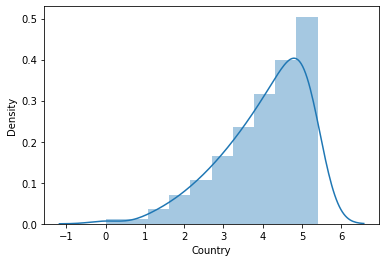

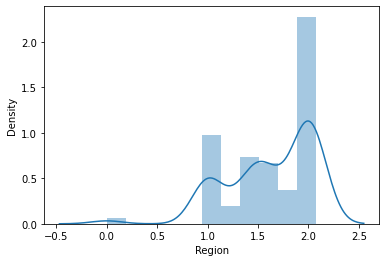

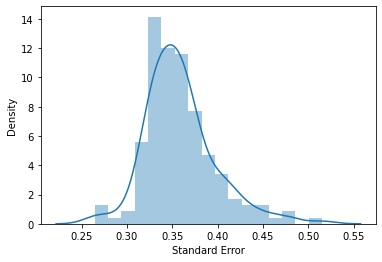

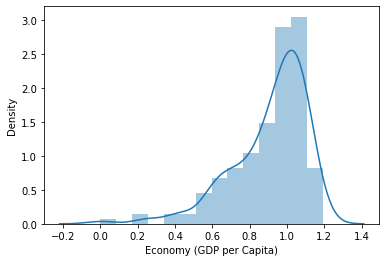

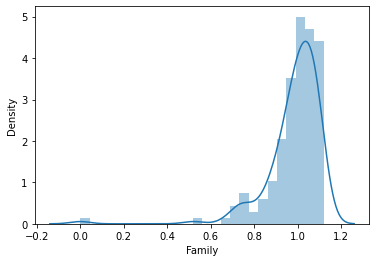

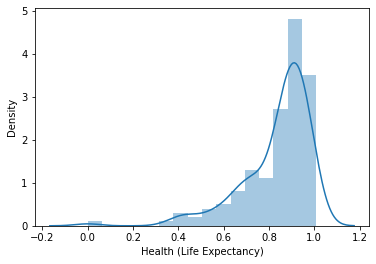

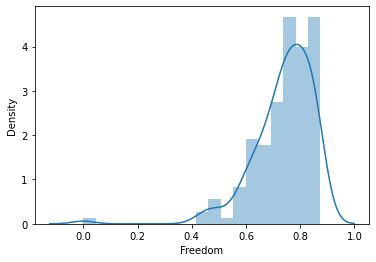

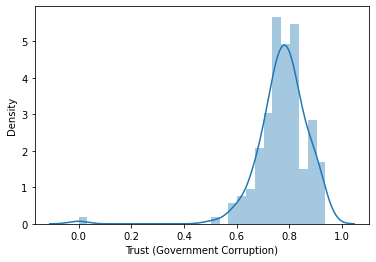

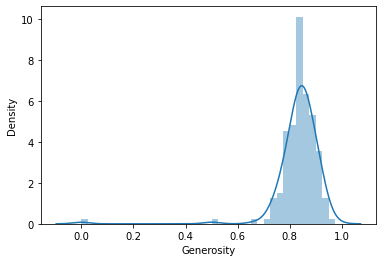

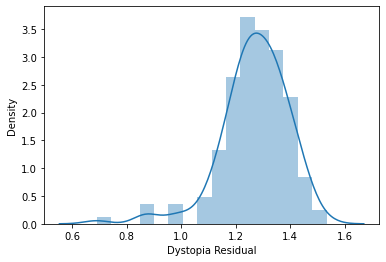

In [54]:
col=['Country', 'Region', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']
for i in ds_x[col]:
    plt.figure()
    sns.distplot(ds_x[i])

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(ds_x)

In [59]:
scaleds=pd.DataFrame(X,columns=ds_x.columns)
scaleds

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.983365,1.000000,0.282756,0.979001,0.995751,0.990568,0.999308,0.989916,0.964124,0.832922
1,0.895257,1.000000,0.457522,0.971435,1.000000,0.991315,0.993012,0.950827,0.977982,0.865400
2,0.851639,1.000000,0.271016,0.973339,0.996655,0.982502,0.996577,0.995116,0.969137,0.828300
3,0.956286,1.000000,0.344679,0.983775,0.994220,0.983814,1.000000,0.984805,0.969721,0.823380
4,0.811648,0.936777,0.302264,0.973405,0.993526,0.986310,0.993747,0.981085,0.979751,0.820867
...,...,...,...,...,...,...,...,...,...,...
153,0.968769,0.986998,0.290120,0.798100,0.936065,0.907649,0.986388,1.000000,0.954488,0.270530
154,0.758198,0.986998,0.315986,0.821056,0.858138,0.878370,0.964666,0.931010,0.946936,0.639856
155,0.984172,0.913837,0.470687,0.901260,0.886651,0.961776,0.851042,0.961098,0.980819,0.000000
156,0.799695,0.986998,0.751100,0.592879,0.873673,0.844488,0.824944,0.938908,0.949650,0.690439


In [27]:
from sklearn.model_selection import train_test_split
scaleds_train,scaleds_test,y_train,y_test =train_test_split(scaleds,y,train_size=0.7)

Training

In [67]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(scaleds_train,y_train)
model.score(scaleds_train,y_train)
pred=model.predict(scaleds_test)
print("Pridected result :",pred)
print("actual ",y_test)

Pridected result : [4.88446297 5.26795823 7.40604269 4.27050682 4.0330642  3.67778221
 6.1302242  4.51227001 5.12876373 4.63341823 5.71587558 4.67737986
 3.65500606 5.19378339 7.19981382 6.29813261 5.99510181 5.12312851
 4.79957311 3.93067024 6.41118801 4.5646655  6.16757915 6.50514203
 4.36912066 5.82409841 2.83877134 6.12281268 6.57499224 6.48507528
 5.33245906 4.50713434 6.940185   5.79056625 3.84491537 4.78792651
 4.43556428 3.57463806 2.90454703 5.07317421 5.36013899 6.29477593
 7.52211837 3.58684545 5.88907671 4.33206421 6.32878394 6.26918694]
actual  97     4.885
77     5.268
5      7.406
131    4.271
136    4.033
147    3.678
41     6.130
121    4.512
84     5.129
113    4.633
63     5.716
111    4.677
150    3.655
80     5.194
12     7.200
37     6.298
44     5.995
86     5.123
103    4.800
140    3.931
34     6.411
116    4.565
40     6.168
30     6.505
125    4.369
57     5.824
157    2.839
42     6.123
28     6.575
31     6.485
75     5.332
122    4.507
17     6.940
59     

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 0.0002157617289711422
Mean squared error: 6.663564959835906e-08
Root Mean Squared Error: 0.00025813881846471493


In [65]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999503914085


r2score